<a href="https://colab.research.google.com/github/jeanigill/proyectoBig/blob/main/Data_Twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# COMPONENTE 1 : Data Fetching

Importar librerias

In [1]:
#Instalación de paquetes
!pip install config
!pip install langdetect

     |████████████████████████████████| 983kB 4.2MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-cp37-none-any.whl size=993242 sha256=2c1281d55a3f55acb210ec6f71b93f29d96881b5b49450447a856f2bc005ae98
  Stored in directory: /root/.cache/pip/wheels/7e/18/13/038c34057808931c7ddc6c92d3aa015cf1a498df5a70268996
Successfully built langdetect


In [2]:
#Importacion de librerias 
import tweepy
import datetime
import pandas as pd

In [3]:
#Utilizar las Credeciales de Twitter 
TWITTER_CONSUMER_KEY = 'XabZgmY0CvdnC80CIqukoEq5G'
TWITTER_CONSUMER_SECRET = 'SfZ95BhHw5zSQhqzbCF89lHC0GRNpzS15Zx0XK1dzsDXHsiTYj'
TWITTER_ACCESS_TOKEN = '1389193434909532160-92Xm44NHeBlFPjPb7EdQZ6TMIPDYs2'
TWITTER_ACCESS_TOKEN_SECRET= '4RhM83yaMr0wFFSzhCxH3IphaBsInhGkLLhYmg3M8kXej'

In [4]:
auth = tweepy.OAuthHandler(TWITTER_CONSUMER_KEY, TWITTER_CONSUMER_SECRET)
auth.set_access_token(TWITTER_ACCESS_TOKEN, TWITTER_ACCESS_TOKEN_SECRET)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [5]:
#Delimitar fechas entre hoy y ayer
today = datetime.date.today()
yesterday= today - datetime.timedelta(days=1)

In [6]:
tweets_list = tweepy.Cursor(api.search, q="#BTSMeal since:" + str(yesterday)+ " until:" + str(today),tweet_mode='extended', lang='en').items(600)

In [7]:
tweets_list

In [8]:
output = []
for tweet in tweets_list:
    text = tweet._json["full_text"]
    print(text)
    username = tweet.user.name
    location = tweet.user.location
    created_at = tweet.created_at
    favourite_count = tweet.favorite_count
    retweet_count = tweet.retweet_count
    source = tweet.source
  
    
    line = {'Text' : text, 'User' : username, 'Location' : location, 'Created' : created_at ,'Favourite_count' : favourite_count, 'Retweet_count' : retweet_count, 'Source' : source}
    output.append(line)

RT @McDonalds: Behind the Sauce: Making of Film
#BTSMeal 

https://t.co/vS1T7epAYG https://t.co/EKGkBe8MC1
1000/10 el bts meal🥰 #BTSMeal #BTS https://t.co/QRL6XzYHqZ
RT @peachyoutoo: WHO PAVED THE WAY?!?
@BTS_twt 
#BTSMeal https://t.co/5U13KGHDOd
RT @jaydenation: #BTSmeal but make it @Josiahchua customs. I guess you can call them 𝑨𝑹𝑴𝒀 𝑩𝑶𝑶𝑻𝑺 🤣🤣 https://t.co/RGYYwTrX7j
RT @KiAmAgU: Woo Army we have a full schedule for everything to come this month,
The calendar has already been released in Mexico and the U…
RT @Bangtanbros7: #BTSMeal glad I was in Mexico for this 😌 https://t.co/sAHL6z53qI
RT @shantbcl64: Considering driving to the U.S./Mexico border for the special packaging of the #BTSMeal 🥲 https://t.co/lxuHSQmrfh
RT @mlovesbangtan_: Got it !!! 💜💜 #BTSMeal 

If Mexico has the same packaging as the us on June 1st I’m gonna cry 🙃 https://t.co/QO0K2Upfky
RT @Stephan99034937: The Perks of living near the Mexico Border #BTSMeal #Mexico #Tijuana Mexico Didn’t Disappoint #periodt #Army https:

In [9]:
#Crear DataFrame y guardar como archivo cvs
df = pd.DataFrame(output)
df.loc[df['Location'] == '', 'Location'] = 'No tiene'
df.to_csv('data.csv', index = False, sep = ';')

In [10]:
df.head(10)

,Text,User,Location,Created,Favourite_count,Retweet_count,Source
0,RT @McDonalds: Behind the Sauce: Making of Fil...,🍊⁷,"she/her , uni",2021-06-23 23:59:27,0,31190,Twitter for iPhone
1,1000/10 el bts meal🥰 #BTSMeal #BTS https://t.c...,R,She/her/ella,2021-06-23 23:57:29,2,0,Twitter for iPhone
2,RT @peachyoutoo: WHO PAVED THE WAY?!?\n@BTS_tw...,_María𓆗🧈,No tiene,2021-06-23 23:56:13,0,2,Twitter for Android
3,RT @jaydenation: #BTSmeal but make it @Josiahc...,rokiah,sandy,2021-06-23 23:55:49,0,1226,Twitter for iPhone
4,RT @KiAmAgU: Woo Army we have a full schedule ...,karla Clarissa Stay 💙♥️Baby Melody🐰🧈,A Whole new world,2021-06-23 23:55:39,0,2,Twitter for iPhone
5,RT @Bangtanbros7: #BTSMeal glad I was in Mexic...,karla Clarissa Stay 💙♥️Baby Melody🐰🧈,A Whole new world,2021-06-23 23:55:36,0,1,Twitter for iPhone
6,RT @shantbcl64: Considering driving to the U.S...,karla Clarissa Stay 💙♥️Baby Melody🐰🧈,A Whole new world,2021-06-23 23:55:30,0,3,Twitter for iPhone
7,RT @mlovesbangtan_: Got it !!! 💜💜 #BTSMeal \n\...,karla Clarissa Stay 💙♥️Baby Melody🐰🧈,A Whole new world,2021-06-23 23:55:27,0,1,Twitter for iPhone
8,RT @Stephan99034937: The Perks of living near ...,karla Clarissa Stay 💙♥️Baby Melody🐰🧈,A Whole new world,2021-06-23 23:55:21,0,1,Twitter for iPhone
9,"RT @hyyh_fm: Now that we are on the topic, som...",karla Clarissa Stay 💙♥️Baby Melody🐰🧈,A Whole new world,2021-06-23 23:55:15,0,2,Twitter for iPhone


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

#data = df.groupby('Source')
#data_x = df.iloc[:, [2]])
#fig = plt.figure(dpi=100, figsize=(10,5))
#ax = fig.gca()
#sns.barplot( ax=ax, orient="h")
#ax.set_ylabel("Card name")
#ax.set_xlabel("Occurrences")
#ax.set_title("Most used cards across Yu-Gi-Oh! decks")

# Componente 2.1
En esta sección del componente 2 comparamos los resultados obtenidos con dos algoritmos diferentes:

*   Vader
*   TextBlob



Un indicador que elegimos para elegir el algoritmo es fijarnos en la distribución de los sentimientos (porcentualmente). Es decir, mientras menos se concentre análisis en uno ó dos sentimientos, mejor.

In [12]:
#IMPORT LIB
import nltk
nltk.download('vader_lexicon')
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [13]:
#Sentimen analysis using vader algorithm
tweets_vader = []
positive_list = []
negative_list = []
neutral_list = []
negative = 0
positive = 0
neutral = 0
tweets_list2 = tweepy.Cursor(api.search, q="#BTSMeal since:" + str(yesterday)+ " until:" + str(today),tweet_mode='extended', lang='es').items(600)
for tweet in tweets_list2:
  tweets_vader.append(tweet._json["full_text"])
  score = SentimentIntensityAnalyzer().polarity_scores(tweet._json["full_text"])
  neg = score['neg']
  pos = score['pos']
  neu = score['neu']
  comp = score['compound']
  
  if neg > pos:
    negative_list.append(tweet._json["full_text"])
    negative +=1

  if pos > neg:
    positive_list.append(tweet._json["full_text"])
    positive +=1

  if pos == neg:
    neutral_list.append(tweet._json["full_text"])
    neutral +=1

In [14]:
#Calcular porcentaje
def calcularPorc(num, entero):
  return 100*float(num)/float(entero)

#Calcular porcentaje usando el algoritmo vader
positive = round(calcularPorc(positive, len(tweets_vader)))
negative = round(calcularPorc(negative, len(tweets_vader)))
neutral = round(calcularPorc(neutral, len(tweets_vader)))


In [15]:
#Crear DataFrame para analizar con TextBlob
tweets = pd.DataFrame(df['Text'])
tweets = tweets.rename(columns={'text': 'Tweets'})

In [16]:
# crear la funcion para obtener la subjectividad con la librería TextBlob
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Crear la funcion para obtener la polaridad
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Crear dos nuevas columnas 'Subjectividad' & 'Polaridad'
tweets['Subjectividad'] = tweets['Text'].apply(getSubjectivity)
tweets['Polaridad'] = tweets['Text'].apply(getPolarity)

#mostrar dataFrame
tweets.head(10)

,Text,Subjectividad,Polaridad
0,RT @McDonalds: Behind the Sauce: Making of Fil...,0.700000,-0.400000
1,1000/10 el bts meal🥰 #BTSMeal #BTS https://t.c...,0.000000,0.000000
2,RT @peachyoutoo: WHO PAVED THE WAY?!?\n@BTS_tw...,0.000000,0.000000
3,RT @jaydenation: #BTSmeal but make it @Josiahc...,0.000000,0.000000
4,RT @KiAmAgU: Woo Army we have a full schedule ...,0.550000,0.350000
5,RT @Bangtanbros7: #BTSMeal glad I was in Mexic...,1.000000,0.500000
6,RT @shantbcl64: Considering driving to the U.S...,0.571429,0.357143
7,RT @mlovesbangtan_: Got it !!! 💜💜 #BTSMeal \n\...,0.125000,0.000000
8,RT @Stephan99034937: The Perks of living near ...,0.400000,0.100000
9,"RT @hyyh_fm: Now that we are on the topic, som...",0.166667,0.125000


In [17]:
# Crear una funcion para calcular negativo (-1), neutral (0) and positivo (+1) 
def getAnalysis(score):
  if score < 0:
    return 'Negativo'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positivo'

tweets['Analisis'] = tweets['Polaridad'].apply(getAnalysis)
# Show the dataframe
tweets

,Text,Subjectividad,Polaridad,Analisis
0,RT @McDonalds: Behind the Sauce: Making of Fil...,0.70,-0.40,Negativo
1,1000/10 el bts meal🥰 #BTSMeal #BTS https://t.c...,0.00,0.00,Neutral
2,RT @peachyoutoo: WHO PAVED THE WAY?!?\n@BTS_tw...,0.00,0.00,Neutral
3,RT @jaydenation: #BTSmeal but make it @Josiahc...,0.00,0.00,Neutral
4,RT @KiAmAgU: Woo Army we have a full schedule ...,0.55,0.35,Positivo
...,...,...,...,...
595,RT @jaydenation: #BTSmeal but make it @Josiahc...,0.00,0.00,Neutral
596,RT @jaydenation: #BTSmeal but make it @Josiahc...,0.00,0.00,Neutral
597,RT @McDo_PH: Need a reason to try the #BTSMeal...,0.95,-0.60,Negativo
598,Cravings satisfied w/ tae🤤💜\n#BTSMeal #BTSMeal...,1.00,0.50,Positivo


In [18]:
#Guardar en distintos df según sentimiento y calcular porcentaje de sentimientos
#Tweets positivos
pos_tweets = tweets[tweets.Analisis == 'Positivo']
pos_tweets = pos_tweets['Text']

positivo = round( (pos_tweets.shape[0] / tweets.shape[0]) * 100, 1)
print(positivo)

#Tweetss negativos
neg_tweets = tweets[tweets.Analisis == 'Negativo']
neg_tweets = neg_tweets['Text']

negativo = round( (neg_tweets.shape[0] / tweets.shape[0]) * 100, 1)
print(negativo)

#Tweets neutrales
neu_tweets = tweets[tweets.Analisis == 'Neutral']
neu_tweets = neu_tweets['Text']

neutro = round( (neu_tweets.shape[0] / tweets.shape[0]) * 100, 1)
print(neutro)

37.3
20.5
42.2


In [19]:
#Imprimimos los resultados obtenidos con ambos algoritmos para comparar.
#Un indicador clave para nosotras es que los sentimientos estén más distribuidos en los tres sentimientos
print("Resultados con Vader (inglés)")
print('Porcentaje de tweets positivos: '+str(positive)+"%")
print("Porcentaje de tweets negativos: "+str(negative)+"%")
print("Porcentaje de tweets neutros: "+str(neutral)+"%")
print("")
print("Resultados con TextBlob (inglés)")
print('Porcentaje de tweets positivos: '+str(positivo)+"%")
print("Porcentaje de tweets negativos: "+str(negativo)+"%")
print("Porcentaje de tweets neutros: "+str(neutro)+"%")

Resultados con Vader (inglés)
Porcentaje de tweets positivos: 10%
Porcentaje de tweets negativos: 41%
Porcentaje de tweets neutros: 48%

Resultados con TextBlob (inglés)
Porcentaje de tweets positivos: 37.3%
Porcentaje de tweets negativos: 20.5%
Porcentaje de tweets neutros: 42.2%


# Componente 2.2 
En esta sección, tras elegir el algoritmo a utilizar (TextBlob conforme a los resultados obtenidos en Componente 2.1), realizamos una limpieza de datos, y luego graficamos de distintas formas para poder ver los resultados obtenidos de nuestro Sentiment Analysis.

In [20]:
#Importar librerías
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import nltk
nltk.download('vader_lexicon')
!pip install emoji
#emojis
import emoji
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
     |████████████████████████████████| 133kB 4.2MB/s 
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [21]:
#Limpiar los tweets
def cleanTweets(tweet):
  tweet = re.sub(r'^https?:\/\/.*[\r\n]*', '', tweet, flags=re.MULTILINE) #remove links
  tweet = re.sub('@[A-Za-z0-9]+', '', tweet) #remove mentions
  tweet = re.sub(':', '', tweet) #remove mentions
  tweet = re.sub('#', '', tweet) #remove hashtags
  tweet = re.sub('RT[\s]+', '', tweet) #remove RT
  tweet = re.sub(emoji.get_emoji_regexp(), r"", tweet) #remove emojis
  tweet = re.sub('@\S+|#\S+|htt\S+', '', tweet) #remove
  return tweet

#Ejecutar función
tweets['Text'] = df['Text'].apply(cleanTweets)

#DataFrame limpio
tweets

,Text,Subjectividad,Polaridad,Analisis
0,Behind the Sauce Making of Film\nBTSMeal \n\n,0.70,-0.40,Negativo
1,1000/10 el bts meal BTSMeal BTS,0.00,0.00,Neutral
2,WHO PAVED THE WAY?!?\n_twt \nBTSMeal,0.00,0.00,Neutral
3,BTSmeal but make it customs. I guess you can ...,0.00,0.00,Neutral
4,Woo Army we have a full schedule for everythin...,0.55,0.35,Positivo
...,...,...,...,...
595,BTSmeal but make it customs. I guess you can ...,0.00,0.00,Neutral
596,BTSmeal but make it customs. I guess you can ...,0.00,0.00,Neutral
597,_PH Need a reason to try the BTSMeal? We can t...,0.95,-0.60,Negativo
598,Cravings satisfied w/ tae\nBTSMeal BTSMealPH T...,1.00,0.50,Positivo


In [35]:
#Crear DataFrame y guardar como archivo cvs
tweets = pd.DataFrame(output)
tweets.to_csv('analisis-TW.csv', index = False, sep = ';')

In [22]:
#Guardar en los DataFrames los tweets limpios
#Tweets positivos
pos_tweets = tweets[tweets.Analisis == 'Positivo']
pos_tweets = pos_tweets['Text']

#Tweetss negativos
neg_tweets = tweets[tweets.Analisis == 'Negativo']
neg_tweets = neg_tweets['Text']

#Tweets neutrales
neu_tweets = tweets[tweets.Analisis == 'Neutral']
neu_tweets = neu_tweets['Text']


In [23]:
#Imprimir tweets positivos
pos_tweets.head()

4    Woo Army we have a full schedule for everythin...
5              BTSMeal glad I was in Mexico for this  
6    Considering driving to the U.S./Mexico border ...
8    The Perks of living near the Mexico Border BTS...
9    _fm Now that we are on the topic, some mexican...
Name: Text, dtype: object

In [24]:
#Imprimir tweets negativos
neg_tweets.head(20)

0         Behind the Sauce Making of Film\nBTSMeal \n\n
13    The initial BTSMeal feedbacks are quite insane...
19        Behind the Sauce Making of Film\nBTSMeal \n\n
20    The initial BTSMeal feedbacks are quite insane...
33    _PH It’s here! The BTSMeal is now available at...
37    [INFO]\n\nAccording to McDonald'sPH Marketing ...
39    The initial BTSMeal feedbacks are quite insane...
54    The initial BTSMeal feedbacks are quite insane...
55    The initial BTSMeal feedbacks are quite insane...
59        Behind the Sauce Making of Film\nBTSMeal \n\n
62    The initial BTSMeal feedbacks are quite insane...
63        Behind the Sauce Making of Film\nBTSMeal \n\n
70        Behind the Sauce Making of Film\nBTSMeal \n\n
77    The initial BTSMeal feedbacks are quite insane...
78    The initial BTSMeal feedbacks are quite insane...
79    The initial BTSMeal feedbacks are quite insane...
82    The initial BTSMeal feedbacks are quite insane...
91    The initial BTSMeal feedbacks are quite in

In [25]:
#Imprimir tweets neutrales
neu_tweets.head(20)

1                      1000/10 el bts meal BTSMeal BTS 
2                 WHO PAVED THE WAY?!?\n_twt \nBTSMeal 
3     BTSmeal but make it  customs. I guess you can ...
7     _ Got it !!!  BTSMeal \n\nIf Mexico has the sa...
10    BTSmeal but make it  customs. I guess you can ...
11       BTS Meals... \n\nBTSMeal  McDonalds Nicaragua 
12    BTSmeal but make it  customs. I guess you can ...
14            _Jk97 Feliz BTS Meal BTSMeal \n_sv  _twt 
15            _Jk97 Feliz BTS Meal BTSMeal \n_sv  _twt 
18    _yes BUTTER on repeat for 1 hour with NO ADS?!...
21    _Alex13 BTS MEAL \nBTS  BTSMeal  \n_bighit  Ni...
22    BUTTER on repeat for 1 hour with NO ADS?! Just...
23    BTSmeal but make it  customs. I guess you can ...
26    BUTTER on loop for 1 hour!! With no ads?! Just...
27       Thank you for the giveaway! \n\n   \n\nBTSMeal
29    BTSmeal but make it  customs. I guess you can ...
32    BTSMeal Gcash giveaway for PH ARMYs \n\nWhen J...
34                    Trying the BTS meal \nbts 

In [26]:
#Promedio de polaridad para cada sentimiento
tweets.groupby('Analisis').agg({
    'Polaridad' : 'mean'
})

,Polaridad
Analisis,
Negativo,-0.335164
Neutral,0.000000
Positivo,0.325071


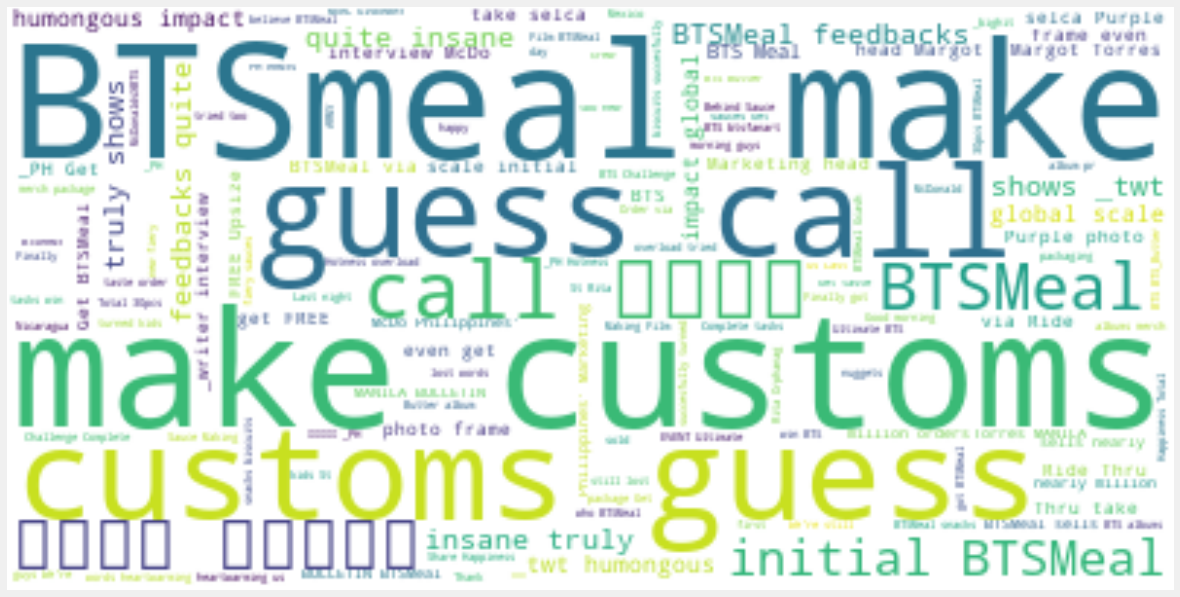

In [27]:
#Gráfico nube de palabras con todos los tweets
text = open('data.csv', 'r').read()
text = ' '.join(tweet for tweet in tweets['Text'])
stopwords.words('english')  #texto en inglés
stopwords = set(stopwords.words('english')) #setear la variable con los stopwords
#stopwords = nltk.corpus.stopwords.words('spanish')  #en el caso de utilizar texto en español
#custom_mask = np.array(Image.open('Twitter-Logo.png')) 
wc = WordCloud(background_color = 'white',
               stopwords = stopwords,
#              mask = custom_mask,
               contour_width = 3,
               contour_color = 'black')

wc.generate(text)
#image_colors = ImageColorGenerator(custom_mask)
#wc.recolor(color_func = image_colors)

#Plotting
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

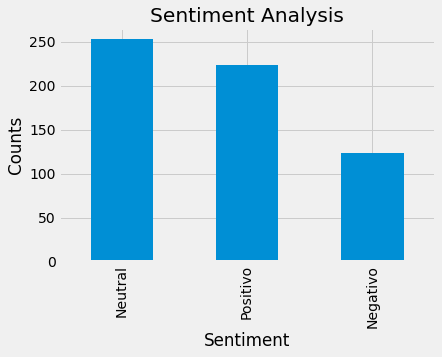

 Los datos están representados en cantidad de tweets


In [28]:
# Histograma de los distintos sentimientos
#Comparar los sentimientos en cantidades de tweets
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
tweets['Analisis'].value_counts().plot(kind = 'bar')

plt.show()
print(" Los datos están representados en cantidad de tweets")


<function matplotlib.pyplot.show>

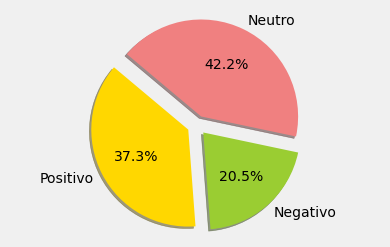

In [29]:
#Graficar un pie chart (para ver los porcentajes de los sentimientos)
#Comparar los sentimientos de forma porcentual
sentiments = 'Positivo', 'Negativo', 'Neutro'
values = positivo, negativo, neutro
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0.1, 0.1, 0.1) #para que salga partidito

#Plot
plt.pie(values, explode = explode, labels = sentiments, colors = colors, autopct = '%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show

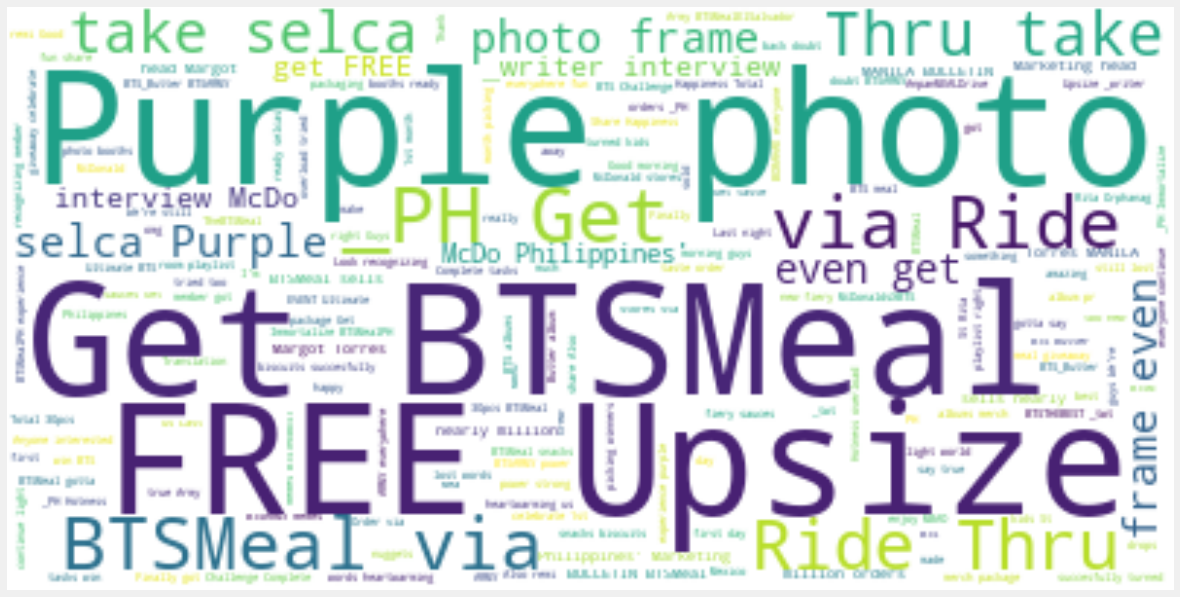

In [31]:
#WORDCLOUD POSITIVO
text = open('data.csv', 'r').read()
text = ' '.join(tweet for tweet in pos_tweets)
#custom_mask = np.array(Image.open('Twitter-Logo.png')) 
wc = WordCloud(background_color = 'white',
               stopwords = stopwords,
#               mask = custom_mask,
               contour_width = 3,
               contour_color = 'black')

wc.generate(text)
#image_colors = ImageColorGenerator(custom_mask)
#wc.recolor(color_func = image_colors)

#Plotting
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

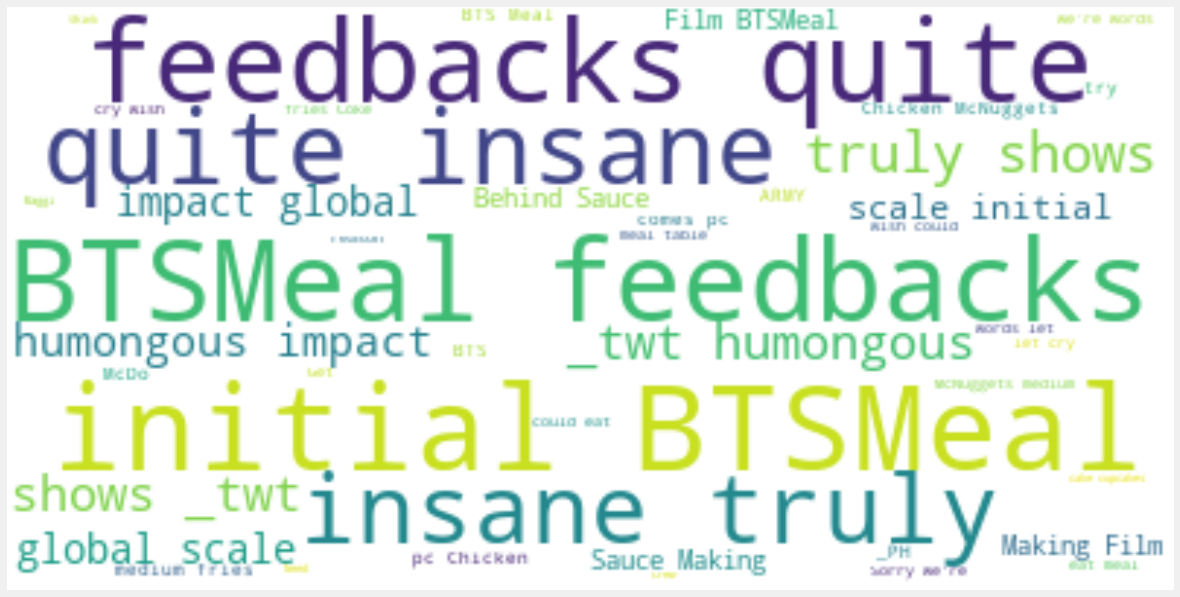

In [32]:
#WORDCLOUD NEGATIVO
text = open('data.csv', 'r').read()
text = ' '.join(tweet for tweet in neg_tweets)
#custom_mask = np.array(Image.open('Twitter-Logo.png')) 
wc = WordCloud(background_color = 'white',
               stopwords = stopwords,
#               mask = custom_mask,
               contour_width = 3,
               contour_color = 'black')

wc.generate(text)
#image_colors = ImageColorGenerator(custom_mask)
#wc.recolor(color_func = image_colors)

#Plotting
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

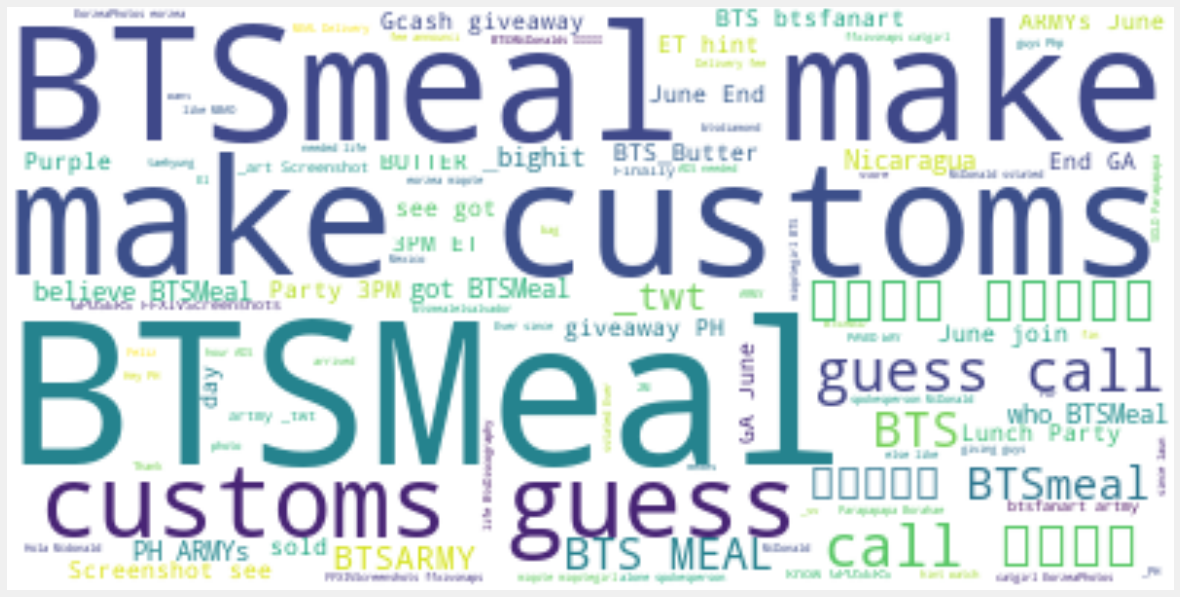

In [33]:
#WORDCLOUD NEUTROS
text = open('data.csv', 'r').read()
text = ' '.join(tweet for tweet in neu_tweets)
#custom_mask = np.array(Image.open('Twitter-Logo.png')) 
wc = WordCloud(background_color = 'white',
               stopwords = stopwords,
#               mask = custom_mask,
               contour_width = 3,
               contour_color = 'black')

wc.generate(text)
#image_colors = ImageColorGenerator(custom_mask)
#wc.recolor(color_func = image_colors)

#Plotting
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()